# pyCHNOSZ demo

Demo of functions available in pyCHNOSZ version 0.1.2 (Feb 7, 2021)

In [1]:
from pyCHNOSZ import info, add_OBIGT, mod_OBIGT, reset, subcrt
from pyCHNOSZ import basis, species, equilibrate, affinity, diagram
import pandas as pd # for mod_OBIGT demo

### info

In [2]:
info("Fe+2")

[526]

In [3]:
info(526)

,name,abbrv,formula,state,ref1,ref2,date,E_units,G,H,...,Cp,V,a1,a2,a3,a4,c1,c2,omega,Z
526,Fe+2,Fe+2,Fe+2,aq,SSWS97,N,1997-11-13,cal,-21870.0,-22050.0,...,-7.9,-22.2,-0.07867,-969.69,9.5479,-23780.0,14.786,-46437.0,143820.0,2.0


In [4]:
info(info(["HCO3-", "CH4"], state=["aq", "gas"]))

info.numeric: Cp of methane(gas) is NA; set by EOS parameters to 8.54 cal K-1 mol-1



,name,abbrv,formula,state,ref1,ref2,date,E_units,G,H,...,Cp,V,a1.a,a2.b,a3.c,a4.d,c1.e,c2.f,omega.lambda,z.T
13,HCO3-,HCO3-,HCO3-,aq,SH88,NA,1997-11-06,cal,-140282.0,-164898.0,...,-8.460000,24.6,0.75621,115.05000,1.2346,-28266.0,12.9395,-47579.0,127330.0,-1.0
2603,methane,CH4,CH4,gas,WEP+82,Kel60,1987-12-15,cal,-12122.4,-17880.0,...,8.543362,0.0,5.65000,0.01144,-46000.0000,0.0,0.0000,0.0,0.0,1500.0


### add_OBIGT and reset

In [5]:
info(info(["K-feldspar", "kaolinite"]))

,name,abbrv,formula,state,ref1,ref2,date,E_units,G,H,...,Cp,V,a,b,c,d,e,f,lambda,T
2557,K-feldspar,Kfs,KAlSi3O8,cr,Ber88,SHD91,2017-10-03,cal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2543,kaolinite,Kln,Al2Si2O9H4,cr,Ber88,NA,2017-10-01,cal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
_ = add_OBIGT("SUPCRT92")

add.OBIGT: read 178 rows; made 65 replacements, 113 additions [energy units: cal]



In [7]:
info(info(["K-feldspar", "kaolinite"]))

info.numeric: Cp of K-feldspar(cr) is NA; set by EOS parameters to 44.22 cal K-1 mol-1

info.numeric: Cp of kaolinite(cr) is NA; set by EOS parameters to 57.27 cal K-1 mol-1



,name,abbrv,formula,state,ref1,ref2,date,E_units,G,H,...,Cp,V,a,b,c,d,e,f,lambda,T
2557,K-feldspar,K-Fs,K(AlSi3)O8,cr,HDNB78,N,1978-05-05,cal,-895374.0,-949188.0,...,44.215918,108.87,76.617,0.004311,-2994500.0,0.0,0.0,0.0,0.0,1400.0
2543,kaolinite,Kln,Al2Si2O5(OH)4,cr,HDNB78,N,1978-05-05,cal,-905614.0,-982221.0,...,57.267215,99.52,72.770,0.029200,-2152000.0,0.0,0.0,0.0,0.0,1000.0


In [8]:
reset()

reset: resetting "thermo" object

OBIGT: loading default database with 1880 aqueous, 3418 total species



### mod_OBIGT

In [9]:
mod_OBIGT("HCO3-", G = -140283.7, Cp = -9)

mod.OBIGT: updated HCO3-(aq)



[13]

In [10]:
info(13)

,name,abbrv,formula,state,ref1,ref2,date,E_units,G,H,...,Cp,V,a1,a2,a3,a4,c1,c2,omega,Z
13,HCO3-,HCO3-,HCO3-,aq,SH88,N,1997-11-06,cal,-140283.7,-164898.0,...,-9.0,24.6,0.75621,115.05,1.2346,-28266.0,12.9395,-47579.0,127330.0,-1.0


In [11]:
reset()

reset: resetting "thermo" object

OBIGT: loading default database with 1880 aqueous, 3418 total species



`mod_OBIGT()` also accepts a Pandas dataframe containing one or more entries in the OBIGT-format.

In [12]:
df = pd.DataFrame({
    'name':["triglycerol", "diglycerol"],
    'abbrv':["C9H20O7", "C6H14O5"],
    'formula':["C9H20O7", "C6H14O5"],
    'state':["aq", "aq"],
    'ref1':["demo", "demo"],
    'ref2':["", ""],
    'date':["2021-2-7", "2021-2-7"],
    'E_units':["J", "J"],
    'G':[-1027210.0, -767130.0],
    'H':[-1528690.0, -1112720.0],
    'S':[394.5, 303.0],
    'Cp':[585.3, 433.8],
    'V':[193.1, 135.1],
    'a1.a':[212.4, 138.3],
    'a2.b':[-14.8, 16.3],
    'a3.c':[-37.0, 45.6],
    'a4.d':[-13.8, -28.1],
    'c1.e':[813.5, 588.5],
    'c2.f':[-106.5, -71.6],
    'omega.lambda':[1.2668, 0.991],
    'z.T':[0, 0]})
df

,name,abbrv,formula,state,ref1,ref2,date,E_units,G,H,...,Cp,V,a1.a,a2.b,a3.c,a4.d,c1.e,c2.f,omega.lambda,z.T
0,triglycerol,C9H20O7,C9H20O7,aq,demo,,2021-2-7,J,-1027210.0,-1528690.0,...,585.3,193.1,212.4,-14.8,-37.0,-13.8,813.5,-106.5,1.2668,0
1,diglycerol,C6H14O5,C6H14O5,aq,demo,,2021-2-7,J,-767130.0,-1112720.0,...,433.8,135.1,138.3,16.3,45.6,-28.1,588.5,-71.6,0.9910,0


In [13]:
mod_OBIGT(df)

mod.OBIGT: added triglycerol(aq) with energy units of J
mod.OBIGT: added diglycerol(aq) with energy units of J



[3419, 3420]

In [14]:
info([3419, 3420])

,name,abbrv,formula,state,ref1,ref2,date,E_units,G,H,...,Cp,V,a1,a2,a3,a4,c1,c2,omega,Z
3419,triglycerol,C9H20O7,C9H20O7,aq,demo,,2021-2-7,J,-1027210.0,-1528690.0,...,585.3,193.1,21.24,-1480.0,-37.0,-138000.0,813.5,-1065000.0,126680.0,0.0
3420,diglycerol,C6H14O5,C6H14O5,aq,demo,,2021-2-7,J,-767130.0,-1112720.0,...,433.8,135.1,13.83,1630.0,45.6,-281000.0,588.5,-716000.0,99100.0,0.0


In [15]:
reset()

reset: resetting "thermo" object

OBIGT: loading default database with 1880 aqueous, 3418 total species



### subcrt

In [16]:
output = subcrt([13, 24])

subcrt: 2 species at 15 values of T (ºC) and P (bar) (wet) [energy units: cal]



,name,formula,state,ispecies
13,HCO3-,HCO3-,aq,13.0
24,SO4-2,SO4-2,aq,24.0



HCO3-:


,T,P,rho,logK,G,H,S,V,Cp
1,0.01,1.000000,0.999829,111.754350,-139681.473815,-164549.882789,24.758605,21.179738,-23.269536
2,25.00,1.000000,0.997061,102.827640,-140282.000000,-164898.000000,23.530000,24.210873,-8.329074
3,50.00,1.000000,0.988030,95.265656,-140863.278012,-165055.703179,23.020406,25.204970,-5.163872
4,75.00,1.000000,0.974864,88.783080,-141434.015984,-165183.296646,22.640209,25.265864,-5.399977
5,100.00,1.013220,0.958393,83.163313,-141994.817523,-165339.818722,22.206802,24.657922,-7.369166
6,125.00,2.320144,0.939073,78.242020,-142542.392121,-165562.342298,21.628832,23.391221,-10.794383
7,150.00,4.757169,0.917058,73.893161,-143072.398342,-165888.091858,20.833690,21.330562,-15.831192
8,175.00,8.918049,0.892343,70.017793,-143578.392686,-166360.479732,19.746474,18.211021,-23.075412
9,200.00,15.536499,0.864743,66.536881,-144051.754733,-167057.267529,18.230913,13.490831,-34.873415
10,225.00,25.478603,0.833873,63.385415,-144479.669460,-168131.551570,16.018443,5.856849,-54.966071



SO4-2:


,T,P,rho,logK,G,H,S,V,Cp
1,0.01,1.000000,0.999829,142.200245,-177735.718840,-215289.445479,11.926887,7.811069,-118.435160
2,25.00,1.000000,0.997061,130.423875,-177930.000000,-217400.000000,4.500000,12.917649,-63.597213
3,50.00,1.000000,0.988030,120.370218,-177983.800105,-218781.778157,0.042386,14.242434,-49.986868
4,75.00,1.000000,0.974864,111.698475,-177938.904196,-219991.866485,-3.565381,13.732272,-47.998648
5,100.00,1.013220,0.958393,104.137734,-177806.992390,-221226.267533,-6.988075,11.798014,-51.485603
6,125.00,2.320144,0.939073,97.478713,-177588.064892,-222597.489689,-10.543136,8.372073,-59.025420
7,150.00,4.757169,0.917058,91.558560,-177276.253319,-224202.306731,-14.449671,3.096372,-70.473737
8,175.00,8.918049,0.892343,86.248419,-176860.892040,-226139.667657,-18.893452,-4.637371,-86.758634
9,200.00,15.536499,0.864743,81.444358,-176326.309161,-228589.397416,-24.202501,-16.079392,-113.729688
10,225.00,25.478603,0.833873,77.058909,-175646.806473,-231919.180364,-31.036232,-34.500274,-159.944759


In [17]:
output["species"]

,name,formula,state,ispecies
13,HCO3-,HCO3-,aq,13.0
24,SO4-2,SO4-2,aq,24.0


In [18]:
output["out"]["HCO3-"].head()

,T,P,rho,logK,G,H,S,V,Cp
1,0.01,1.00000,0.999829,111.754350,-139681.473815,-164549.882789,24.758605,21.179738,-23.269536
2,25.00,1.00000,0.997061,102.827640,-140282.000000,-164898.000000,23.530000,24.210873,-8.329074
3,50.00,1.00000,0.988030,95.265656,-140863.278012,-165055.703179,23.020406,25.204970,-5.163872
4,75.00,1.00000,0.974864,88.783080,-141434.015984,-165183.296646,22.640209,25.265864,-5.399977
5,100.00,1.01322,0.958393,83.163313,-141994.817523,-165339.818722,22.206802,24.657922,-7.369166


In [19]:
output["out"]["SO4-2"].head()

,T,P,rho,logK,G,H,S,V,Cp
1,0.01,1.00000,0.999829,142.200245,-177735.718840,-215289.445479,11.926887,7.811069,-118.435160
2,25.00,1.00000,0.997061,130.423875,-177930.000000,-217400.000000,4.500000,12.917649,-63.597213
3,50.00,1.00000,0.988030,120.370218,-177983.800105,-218781.778157,0.042386,14.242434,-49.986868
4,75.00,1.00000,0.974864,111.698475,-177938.904196,-219991.866485,-3.565381,13.732272,-47.998648
5,100.00,1.01322,0.958393,104.137734,-177806.992390,-221226.267533,-6.988075,11.798014,-51.485603


In [20]:
output = subcrt(species=["H2", "O2", "H2O"],
                coeff = [-1.0, -0.5, 1.0],
                state = ["aq", "gas", "liq"],
                T=[30, 50], P=1000)

subcrt: 3 species at 2 values of T (ºC) and P (bar) (wet) [energy units: cal]



,coeff,name,formula,state,ispecies
62,-1.0,H2,H2,aq,62.0
2612,-0.5,oxygen,O2,gas,2612.0
1,1.0,water,H2O,liq,1.0


,T,P,rho,logK,G,H,S,V,Cp
1,30.0,1000,1.035962,43.972483,-60995.224481,-67334.946053,-21.070030,-7.663664,-24.488829
2,50.0,1000,1.027403,40.952949,-60554.525428,-67908.486770,-22.904593,-8.086124,-21.219328


In [21]:
output["reaction"]

,coeff,name,formula,state,ispecies
62,-1.0,H2,H2,aq,62.0
2612,-0.5,oxygen,O2,gas,2612.0
1,1.0,water,H2O,liq,1.0


In [22]:
output["out"]

,T,P,rho,logK,G,H,S,V,Cp
1,30.0,1000,1.035962,43.972483,-60995.224481,-67334.946053,-21.070030,-7.663664,-24.488829
2,50.0,1000,1.027403,40.952949,-60554.525428,-67908.486770,-22.904593,-8.086124,-21.219328


### proteins

In [23]:
info("LYSC_CHICK")
output = subcrt("LYSC_CHICK", T=[25, 50, 75, 100])

protein.OBIGT: found 
LYSC_CHICK (C613H959N193O185S10, 
129 residues)

subcrt: 1 species at 4 values of T (ºC) and P (bar) (wet) [energy units: cal]



,name,formula,state,ispecies
3419,LYSC_CHICK,C613H959N193O185S10,aq,3419.0



LYSC_CHICK:


,T,P,rho,logK,G,H,S,V,Cp
1,25.0,1.00000,0.997061,3250.232004,-4.434110e+06,-1.057328e+07,4337.860000,10420.950081,6415.518468
2,50.0,1.00000,0.988030,3076.734742,-4.549372e+06,-1.040345e+07,4884.505798,10600.231211,7073.981185
3,75.0,1.00000,0.974864,2936.711074,-4.678266e+06,-1.022241e+07,5423.991680,10708.145189,7376.581257
4,100.0,1.01322,0.958393,2823.196483,-4.820386e+06,-1.003568e+07,5941.891731,10782.933049,7548.444290


In [24]:
output["out"]["LYSC_CHICK"]

,T,P,rho,logK,G,H,S,V,Cp
1,25.0,1.00000,0.997061,3250.232004,-4.434110e+06,-1.057328e+07,4337.860000,10420.950081,6415.518468
2,50.0,1.00000,0.988030,3076.734742,-4.549372e+06,-1.040345e+07,4884.505798,10600.231211,7073.981185
3,75.0,1.00000,0.974864,2936.711074,-4.678266e+06,-1.022241e+07,5423.991680,10708.145189,7376.581257
4,100.0,1.01322,0.958393,2823.196483,-4.820386e+06,-1.003568e+07,5941.891731,10782.933049,7548.444290


### Basis, Species, Affinity, Diagram

In [25]:
basis("CHNOSe")

,C,H,N,O,S,Z,ispecies,logact,state
CO2,1.0,0.0,0.0,2.0,0.0,0.0,1511,-3.0,aq
H2O,0.0,2.0,0.0,1.0,0.0,0.0,1,0.0,liq
NH3,0.0,3.0,1.0,0.0,0.0,0.0,64,-4.0,aq
H2S,0.0,2.0,0.0,0.0,1.0,0.0,65,-7.0,aq
e-,0.0,0.0,0.0,0.0,0.0,-1.0,2,-7.0,aq
H+,0.0,1.0,0.0,0.0,0.0,1.0,3,-7.0,aq


In [26]:
species(["CO2", "HCO3-", "CO3-2"])

,CO2,H2O,NH3,H2S,e-,H+,ispecies,logact,state,name
1,1.0,0.0,0.0,0.0,0.0,0.0,1511,-3.0,aq,CO2
2,1.0,1.0,0.0,0.0,0.0,-1.0,13,-3.0,aq,HCO3-
3,1.0,1.0,0.0,0.0,0.0,-2.0,14,-3.0,aq,CO3-2


In [27]:
a = affinity(pH=[2,14])

affinity: temperature is 25 ºC

affinity: pressure is Psat

affinity: variable 1 is pH at 256 values from 2 to 14

subcrt: 9 species at 25 ºC and 1 bar (wet) [energy units: cal]



In [28]:
a = equilibrate(a)

balance: on moles of CO2 in formation reactions

equilibrate: n.balance is 1 1 1

equilibrate: loga.balance is -2.52287874528034

equilibrate: using boltzmann method



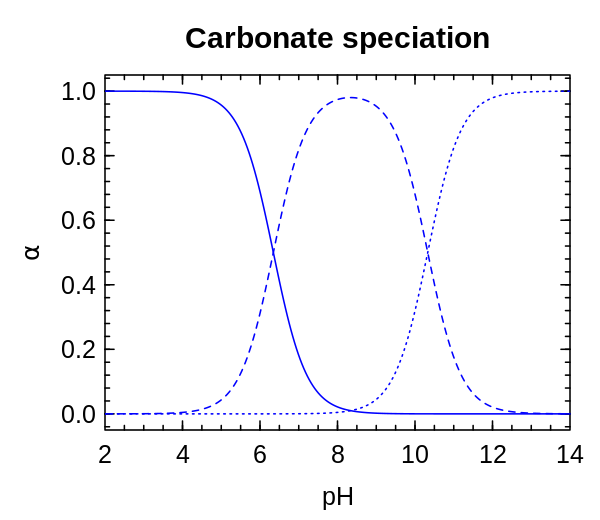

In [29]:
plot, args1 = diagram(a, names=["","",""], col="blue", alpha=True, main="Carbonate speciation")

affinity: temperature is 90 ºC

affinity: pressure is Psat

affinity: variable 1 is pH at 256 values from 2 to 14

subcrt: 9 species at 90 ºC and 1 bar (wet) [energy units: cal]



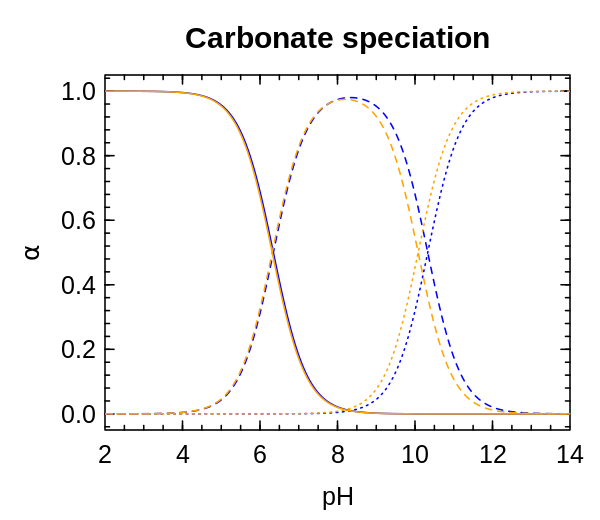

balance: on moles of CO2 in formation reactions

diagram: plotting A/(2.303RT) / n.balance



In [30]:
a = affinity(pH=[2,14], T=90)
plot2, args2 = diagram(a, names=["","",""], col="orange", alpha=True, add=args1)

affinity: temperature is 180 ºC

affinity: pressure is Psat

affinity: variable 1 is pH at 256 values from 2 to 14

subcrt: 9 species at 180 ºC and 10.02 bar (wet) [energy units: cal]



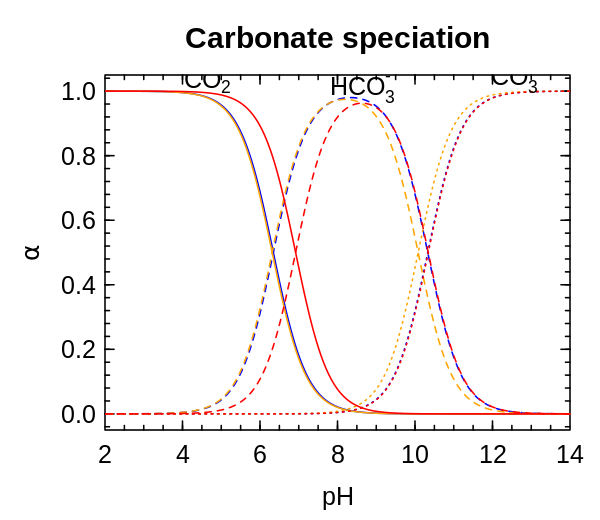

balance: on moles of CO2 in formation reactions

diagram: plotting A/(2.303RT) / n.balance

balance: on moles of CO2 in formation reactions

diagram: plotting A/(2.303RT) / n.balance



In [31]:
a = affinity(pH=[2,14], T=180)
plot2, args3 = diagram(a, alpha=True, add=[args1, args2], col="red", col_names="blue")

affinity: pressure is Psat

affinity: variable 1 is pH at 600 values from 2 to 14

affinity: variable 2 is T at 600 values from 273.15 to 623.15 K

subcrt: 9 species at 600 values of T (ºC) and P (bar) (wet) [energy units: cal]



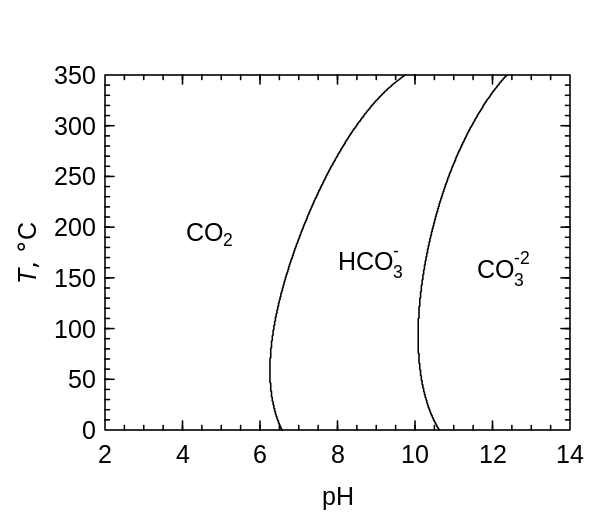

balance: on moles of CO2 in formation reactions

diagram: using maximum affinity method for 2-D diagram



In [32]:
a = affinity(pH=[2, 14, 600], T=[0, 350, 600])
plot, args = diagram(a)